In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data and EDA

In [2]:
full_data = pd.read_csv("./data/Titanic/train.csv")

In [3]:
full_data.shape

(891, 12)

In [4]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
full_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observation: Age includes many NaN-Values

In [6]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observation: There is a wide range between the Fare prices. Let's visualize this through a whisker plot.

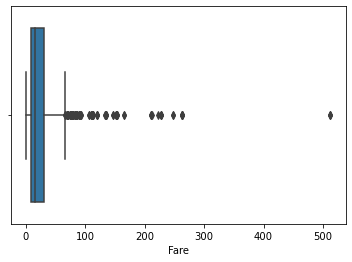

In [7]:
sns.boxplot(x=full_data["Fare"]);

In [8]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
amount_survived = full_data["Survived"].sum()
print(f"{amount_survived} of {full_data.shape[0]} people survived the Titanic tradegy")

342 of 891 people survived the Titanic tradegy


## 2. Build a first Logistic Regression model and a Baseline model

### 2.1 Define X and y

In [10]:
X_full = full_data[["Pclass"]]
y_full = full_data["Survived"]

In [11]:
X_full.shape, y_full.shape

((891, 1), (891,))

### 2.2 Train-test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X, X_test, y, y_test = train_test_split(X_full, y_full, test_size = 0.2, random_state = 420)

In [14]:
X.shape, y.shape

((712, 1), (712,))

In [15]:
X_test.shape, y_test.shape

((179, 1), (179,))

### 2.3 Create the Baseline model

In [16]:
from sklearn.dummy import DummyClassifier

In [17]:
dm = DummyClassifier(strategy= 'most_frequent')

In [18]:
dm.fit(X, y)

DummyClassifier(strategy='most_frequent')

In [19]:
print(f"The Baseline model reaches a score of {round(dm.score(X_test, y_test),2)}")

The Baseline model reaches a score of 0.59


### 2.4 Fit the Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_reg = LogisticRegression()

In [22]:
log_reg.fit(X, y)

LogisticRegression()

### 2.5: Print the coefficients calculated by the model.

In [23]:
print(f"The model-calculated intercept w0 (also called Bias) is {round(log_reg.intercept_[0], 4)} and the weight w1 is {round(log_reg.coef_[0][0],4)}")

The model-calculated intercept w0 (also called Bias) is 1.3689 and the weight w1 is -0.8315


### 2.6 Calculate the probabilities for your data points belonging to the positive class.

In [24]:
probs = log_reg.predict_proba(X)
probs.shape

(712, 2)

### 2.7 Evaluate the first version of the model

In [36]:
round(log_reg.score(X_test, y_test),2), round(log_reg.score(X, y),2)

(0.68, 0.68)

In [38]:
print(f"The result of our first regression model is an accuracy of {round(log_reg.score(X_test, y_test),2)}")

The result of our first regression model is an accuracy of 0.68


## 3. Change threshold and check result of the model

#### 3.1 Changing the threshold to 0.9

In [26]:
prob_df = pd.DataFrame(probs)
prob_df.shape

(712, 2)

In [27]:
prob_df['threshold'] = 0.9
prob_df["y_true"] = y.values
prob_df.head()

,0,1,threshold,y_true
0,0.368788,0.631212,0.9,1
1,0.368788,0.631212,0.9,1
2,0.755023,0.244977,0.9,0
3,0.755023,0.244977,0.9,0
4,0.572995,0.427005,0.9,0


In [28]:
prob_df['new_prediction'] = (prob_df[1]>prob_df["threshold"]).astype(int)
prob_df

,0,1,threshold,y_true,new_prediction
0,0.368788,0.631212,0.9,1,0
1,0.368788,0.631212,0.9,1,0
2,0.755023,0.244977,0.9,0,0
3,0.755023,0.244977,0.9,0,0
4,0.572995,0.427005,0.9,0,0
...,...,...,...,...,...
707,0.368788,0.631212,0.9,1,0
708,0.755023,0.244977,0.9,0,0
709,0.755023,0.244977,0.9,0,0
710,0.368788,0.631212,0.9,1,0


In [29]:
prob_df["new_prediction"].sum()

0

In [30]:
Accuracy_0_9 = np.sum(prob_df["y_true"] == prob_df["new_prediction"])/len(prob_df["new_prediction"])
print(f"The accuracy with a threshold of 0.9 is {round(Accuracy_0_9, 2)}")

The accuracy with a threshold of 0.9 is 0.62


Observation: With a threshold of 0.9 all new_prediction values where set to "0", which means that the model assumes everybody dies. This results in an accuracy of 0.62 compared to the slightly better 0.68 of the initial Logistic Regression model from above.

### 3.2 Changing the threshold to 0.1

In [31]:
prob_df['threshold'] = 0.1
prob_df

,0,1,threshold,y_true,new_prediction
0,0.368788,0.631212,0.1,1,0
1,0.368788,0.631212,0.1,1,0
2,0.755023,0.244977,0.1,0,0
3,0.755023,0.244977,0.1,0,0
4,0.572995,0.427005,0.1,0,0
...,...,...,...,...,...
707,0.368788,0.631212,0.1,1,0
708,0.755023,0.244977,0.1,0,0
709,0.755023,0.244977,0.1,0,0
710,0.368788,0.631212,0.1,1,0


In [32]:
prob_df['new_prediction'] = (prob_df[1]>prob_df["threshold"]).astype(int)

In [33]:
prob_df["new_prediction"].sum()

712

In [35]:
Accuracy_0_1 = np.sum(prob_df["y_true"] == prob_df["new_prediction"])/len(prob_df["new_prediction"])
print(f"The accuracy with a threshold of 0.1 is {round(Accuracy_0_1, 2)}")

The accuracy with a threshold of 0.1 is 0.38


Observation: With a threshold of 0.1 all new_prediction values where set to "1" which means that the model assumes that everybody will survive. This results in an accuracy of 0.38.